# Notes: Tiles, murals and [prime numbers](https://youtu.be/pp06oGD4m00)

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.patches import Polygon
import math
from copy import copy

## Basic definitions

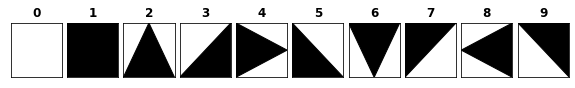

In [2]:
def get_0(color, alpha):
    return Polygon([(0,0)], color=color, alpha=alpha)

def get_1(color, alpha):
    return Polygon([(0,0), (0,1), (1,1), (1,0)], color=color,alpha=alpha)

def get_2(color, alpha):
    return Polygon([(0,0), (0.5,1), (1,0)], color=color,alpha=alpha)

def get_3(color, alpha):
    return Polygon([(0,0), (1,1), (1,0)], color=color,alpha=alpha)

def get_4(color, alpha):
    return Polygon([(0,0),(1,0.5), (0,1)], color=color,alpha=alpha)

def get_5(color, alpha):
    return Polygon([(0,0), (0,1), (1,0)], color=color,alpha=alpha)

def get_6(color, alpha):
    return Polygon([(0,1), (0.5,0), (1,1)], color=color,alpha=alpha)

def get_7(color, alpha):
    return Polygon([(0,0), (1,1), (0,1)], color=color,alpha=alpha)

def get_8(color, alpha):
    return Polygon([(0,0.5), (1,1),(1,0)], color=color,alpha=alpha)

def get_9(color, alpha):
    return Polygon([(1,0), (1,1), (0,1)], color=color,alpha=alpha)


def num2tile(num, color="k", alpha=1.0):
    if num==0:
        return get_0(color,alpha)
    elif num == 1:
        return get_1(color,alpha)
    elif num == 2:
        return get_2(color,alpha)
    elif num == 3:
        return get_3(color,alpha)
    elif num == 4:
        return get_4(color,alpha)
    elif num == 5:
        return get_5(color,alpha)
    elif num == 6:
        return get_6(color,alpha)
    elif num == 7:
        return get_7(color,alpha)
    elif num == 8:
        return get_8(color,alpha)
    elif num == 9:
        return get_9(color,alpha)
    
    
def float2vector(float_):
    float_str = "{:.10f}".format(float_)
    return [int(x) for x in "".join(re.findall('[0-9]+', float_str))]
    
v = [0,1,2,3,4,5,6,7,8,9]
fig, _ = plt.subplots(1,10, figsize=(10,1))
fig.subplots_adjust(hspace=0.01, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n, "k"))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")



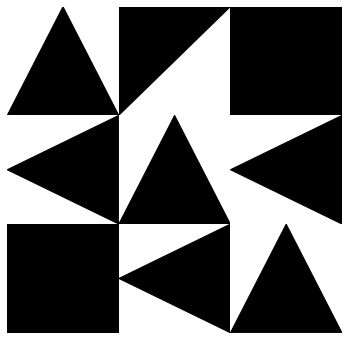

In [3]:
v = float2vector(math.e)
fig, _ = plt.subplots(3,3, figsize=(6,6))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

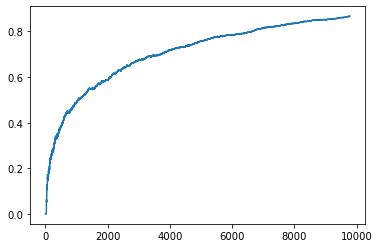

In [4]:
primes = pd.read_csv("data/primes.csv")
primes.loc[:, "gap<10"] = (primes["gap"] <10).astype(int)
primes.loc[:, "gap>=10"] = (primes["gap"] >=10).astype(int)
primes.loc[:, "gap<10_cumsum"]  = primes["gap<10"].cumsum()
primes.loc[:, "gap>=10_cumsum"]  = primes["gap>=10"].cumsum()
primes.loc[:, "ratio"]  = primes["gap>=10_cumsum"]/primes["gap<10_cumsum"]
primes["ratio"].plot();

In [5]:
def get_number_and_color(x,value_before, prefix):
    marker = "{}_{}".format(prefix,x)
    color1, color2 = "salmon", "dodgerblue"
    color_before = value_before[1][0] 
    if x < 10:
        return ([x], ["k"], [marker])
    else: 
        numbers = [int(i) for i in str(x)]
        if color_before == color2 or color_before == "k":
            color = color1
        else:
            color = color2
        colors = [color]*len(numbers)
        return (numbers, colors, [marker]*len(numbers))
    
    
def list_of_numbers2commands(list_of_numbers):
    value_before = ([0], ["b"], 0)
    numbers_as_tiles = []
    color_list = []
    markers = []
    for i,n in enumerate(list_of_numbers):
        new_value = get_number_and_color(n, value_before, prefix=i)
        number_l,color_l, marker = new_value[0], new_value[1], new_value[2]
        numbers_as_tiles+=number_l
        color_list+=color_l
        value_before = new_value
        markers.append(marker)
    
    new_markers = []
    for m in markers:
        new_markers+=m

    assert len(color_list) == len(numbers_as_tiles)
    return numbers_as_tiles, color_list, new_markers

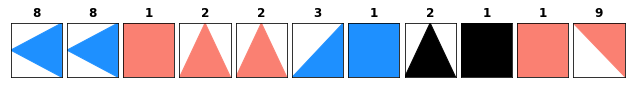

In [6]:
list_of_numbers = [88,122,31,2,1,19]
numbers_as_tiles, color_list, markers = list_of_numbers2commands(list_of_numbers)

fig, _ = plt.subplots(1,len(numbers_as_tiles), figsize=(len(numbers_as_tiles),1))
fig.subplots_adjust(hspace=0.01, wspace=0.10)
for n,c,ax in zip(numbers_as_tiles,color_list, fig.axes):
    ax.add_patch(num2tile(n, c))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")
    

## [Primes](http://compoasso.free.fr/primelistweb/page/prime/liste_online_en.php)

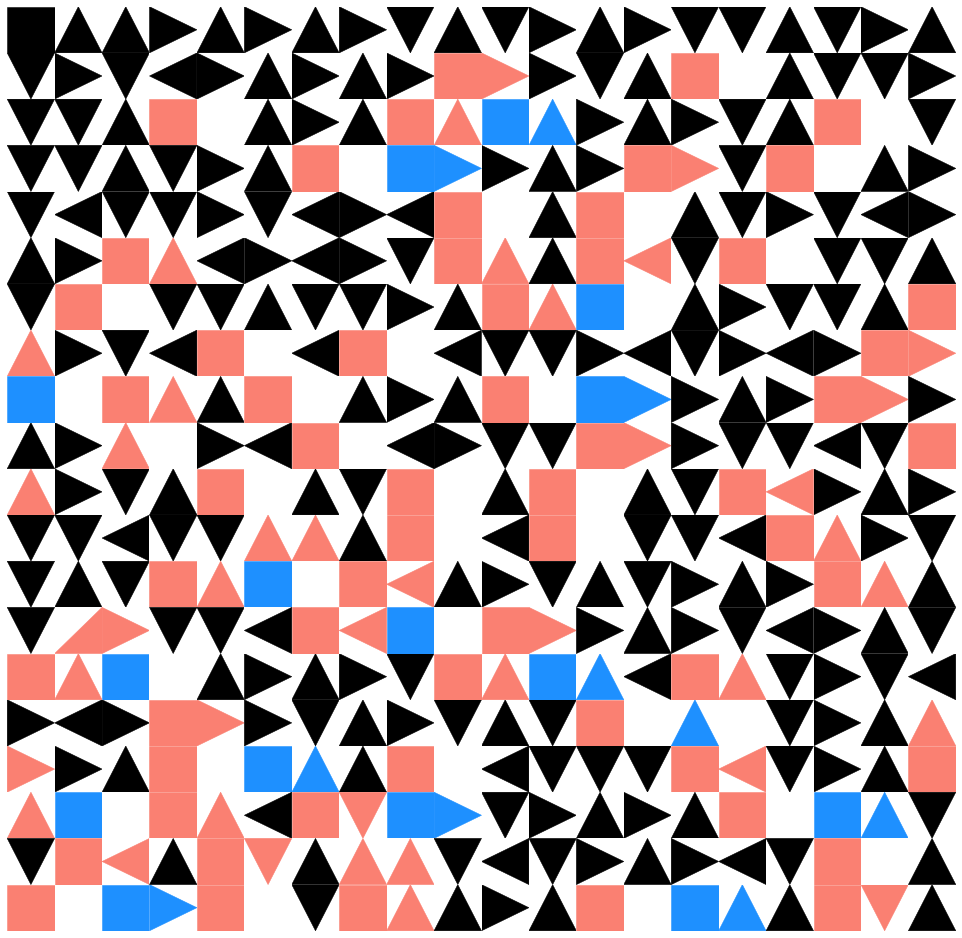

In [11]:
begin = 0
end = 18*18

# begin = 1100
# end = begin + 500

prime_gap_v = primes["gap"].iloc[begin:end]

numbers_as_tiles, color_list, markers  = list_of_numbers2commands(prime_gap_v)


bound = len(numbers_as_tiles)
half = np.sqrt(bound)
size = np.min([int(np.floor(half)),50])


plt.style.use('ggplot')
alpha = 0.85

fig, _ = plt.subplots(size,size, figsize=(size*alpha,size*alpha))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
new_markes = []
for n,c,marker,ax in zip(numbers_as_tiles,color_list,markers, fig.axes):
    new_markes.append(marker)
    ax.add_patch(num2tile(n,c))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')
    
count = np.max([int(m.split("_")[0]) for m in new_markes])+1

out_path ="img/mural_prime_gap_{}.png".format(count)
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

size

In [8]:
size*size

100